Dataset link: https://www.kaggle.com/datasets/altruistdelhite04/gold-price-data


Importing the dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Data Collection and Data Processing

In [2]:
Gold_dataset = pd.read_csv('/content/gold_price_data.csv')
Gold_dataset.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [3]:
Gold_dataset.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [4]:
Gold_dataset.shape

(2290, 6)

In [5]:
Gold_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [6]:
Gold_dataset.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [7]:
Gold_dataset.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Correlation of data

In [8]:
correlation = Gold_dataset.corr()

<ipython-input-8-266847a30284>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = Gold_dataset.corr()


<Axes: >

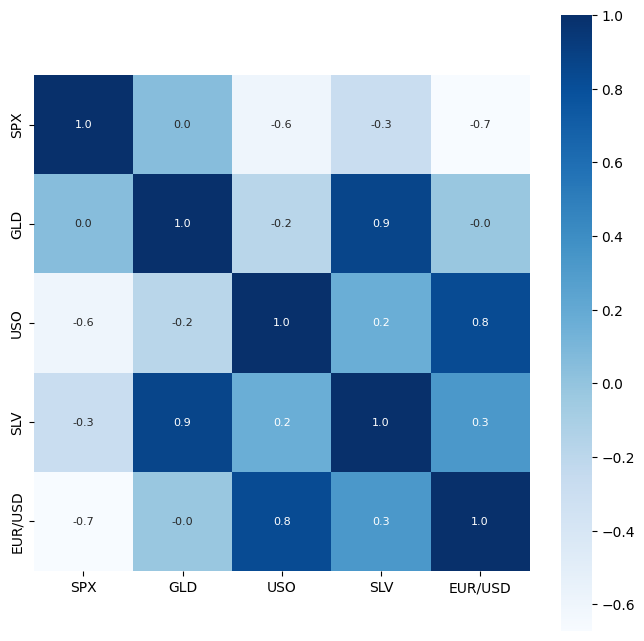

In [9]:
plt.figure(figsize=(8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt= '.1f', annot=True, annot_kws={'size':8}, cmap= 'Blues')

In [10]:
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


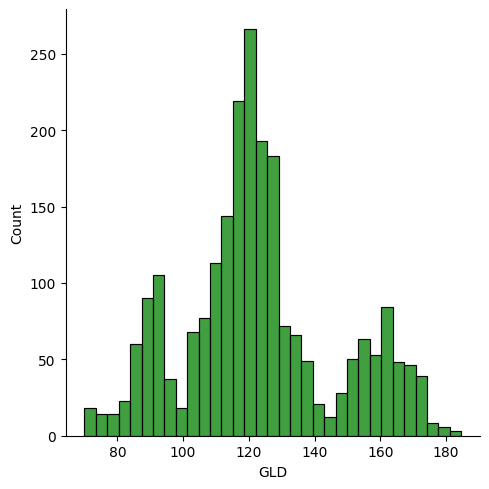

In [11]:
sns.displot(Gold_dataset['GLD'], color='green')

In [12]:
X = Gold_dataset.drop(['Date','GLD'],axis = 1)
Y = Gold_dataset['GLD']

In [13]:
print(X)
print(Y)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]
0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2, random_state=2)

Model Training ---> Random Forest Regressor

In [15]:
model = RandomForestRegressor(n_estimators=100)

In [16]:
model.fit(X_train, Y_train)

RandomForestRegressor()

In [17]:
test_data_prediction = model.predict(X_test)

In [18]:
print(test_data_prediction)

[168.29239974  82.36669966 116.22840034 127.78340073 120.62590129
 154.84079726 150.25099821 125.97240059 117.68859866 126.02700038
 116.75500083 171.69350048 142.16979894 167.87529803 115.21549977
 117.32630042 137.70910293 170.079401   159.02510351 160.53980075
 155.21890005 125.63340003 176.34009959 157.35420398 125.23550039
  93.73339986  77.59400009 120.28170031 119.13609913 167.52589915
  88.11490012 125.16110029  91.25280073 117.87380005 121.23279839
 136.39270069 115.54540159 114.98710056 148.44379973 107.04970115
 104.12580251  87.23249786 126.56640067 118.22890062 152.70359911
 119.66690014 108.52389979 108.40109821  93.11870034 127.25819738
  74.81420044 113.70499908 121.13400037 111.27929919 118.77519876
 120.77249904 159.90159981 167.29750106 147.10909695  85.8613986
  94.30120032  86.77509924  90.56580032 119.09000065 126.45760081
 127.51729999 169.92739972 122.32439918 117.22379873  98.48120002
 167.02280067 142.89339833 131.19210241 121.1755024  120.65389944
 119.520700

In [19]:
error_score = metrics.r2_score(Y_test, test_data_prediction)

In [20]:
print(error_score)

0.9895153472683508


In [21]:
Y_test = list(Y_test)

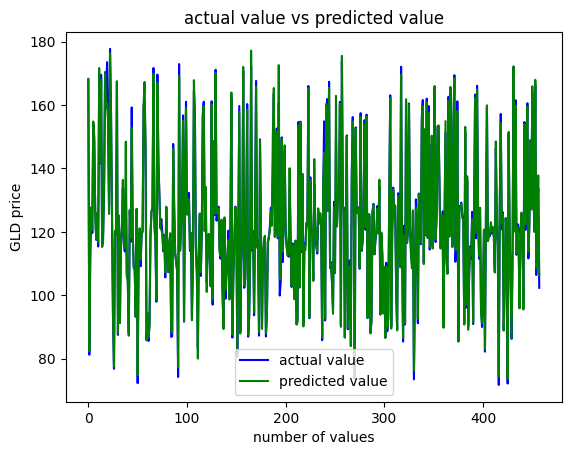

In [22]:
plt.plot(Y_test, color = 'blue', label = 'actual value')
plt.plot(test_data_prediction, color='green', label= 'predicted value')
plt.title('actual value vs predicted value')
plt.xlabel('number of values')
plt.ylabel('GLD price')
plt.legend()
plt.show()